<a href="https://colab.research.google.com/github/Nikunjbansal99/BreastCancerClassification/blob/main/BreastCancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Methodology**


*   **Importing Some Basic Libraries**
*   **Importing Data**
    * **Assigning Column's Name**
*   **Performing Descriptive Analysis on the dataset**
*   **Checking null values**
    * **Removing Rows/Tuples Containing Symbols in place of value**
    * **Reseting Index**
*   **Analysis of Target Variable**
*   **Doing Upsampling on Minority Class**
*   **Plotting Correlation Matrix and Heat Map**
*   **Perform Analysis using Distplot**
*   **Splitting train_df into 70% and 30% to construct Training data and Testing data respectively**
*   **Implementing Decision Tree Classifier**
*   **Implementing Perceptron Classifier**
*   **Implementing K-Nearest Neighbour Classifier**
*   **Performing Prediction on Training Data**
*   **Performing Prediction on Testing Data**
*   **For Training data, Evaluating all Model's based on Confusion Matrix and Classification Report for each model**
*   **For Testing data, Evaluating all Model's based on Confusion Matrix and Classification Report for each model**
*   **Save predictions of best Model on Testing data in .csv format**

# **Importing Some Basic Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# **Importing Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
input_data_dir = "/content/gdrive/My Drive/Additional_Tasks/"
full_df = pd.read_csv(os.path.join(input_data_dir, "breast-cancer-wisconsin.data"),header=None)

### **Assigning Column's Name :**

In [ ]:
new_header = ['Smpl_code_num','Clump_Thickness','Unif_Cell_Size','Unif_Cell_Shape','Marginal_Adhesion','Single_Epith_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']

In [ ]:
full_df.columns = new_header 

In [ ]:
full_df.head()

,Smpl_code_num,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marginal_Adhesion,Single_Epith_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# **Descriptive Analysis of the dataset**

In [ ]:
print("Size of Breast Cancer dataset       : {}".format(full_df.shape))

Size of Breast Cancer dataset       : (699, 11)


## **Data Description**

   ##  Attribute                
   -- -----------------------------------------
   1. Sample code number        
   2. Clump Thickness             
   3. Uniformity of Cell Size     
   4. Uniformity of Cell Shape    
   5. Marginal Adhesion           
   6. Single Epithelial Cell Size 
   7. Bare Nuclei                
   8. Bland Chromatin            
   9. Normal Nucleoli              
   10. Mitoses                    
   11. Class                     

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Smpl_code_num           699 non-null    int64 
 1   Clump_Thickness         699 non-null    int64 
 2   Unif_Cell_Size          699 non-null    int64 
 3   Unif_Cell_Shape         699 non-null    int64 
 4   Marginal_Adhesion       699 non-null    int64 
 5   Single_Epith_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei             699 non-null    object
 7   Bland_Chromatin         699 non-null    int64 
 8   Normal_Nucleoli         699 non-null    int64 
 9   Mitoses                 699 non-null    int64 
 10  Class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Smpl_code_num,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Unif_Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Unif_Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epith_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


## **Removing Rows/Tuples Containing Symbols in place of value :**

In [ ]:
for i in new_header:
    full_df =  pd.DataFrame(full_df[full_df[i] != '?'])

### **Reseting Index :**

In [ ]:
full_df = full_df.reset_index(drop=True)

In [ ]:
full_df['Bare_Nuclei'] = full_df['Bare_Nuclei'].astype(int)     # Changing Bare_Nuclei data type from Object to int64

In [ ]:
full_df.head()

,index,Smpl_code_num,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marginal_Adhesion,Single_Epith_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0,1000025,5,1,1,1,2,1,3,1,1,2
1,1,1002945,5,4,4,5,7,10,3,2,1,2
2,2,1015425,3,1,1,1,2,2,3,1,1,2
3,3,1016277,6,8,8,1,3,4,3,7,1,2
4,4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
full_df = full_df.drop(['Smpl_code_num'], axis=1)

In [ ]:
full_df.head()

,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marginal_Adhesion,Single_Epith_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## **NULL VALUES**

In [ ]:
full_df.isna().sum()                        # Printing a count of missing value w.r.t each feature in full_df

Clump_Thickness           0
Unif_Cell_Size            0
Unif_Cell_Shape           0
Marginal_Adhesion         0
Single_Epith_Cell_Size    0
Bare_Nuclei               0
Bland_Chromatin           0
Normal_Nucleoli           0
Mitoses                   0
Class                     0
dtype: int64

# **Analysis of Target Variable**

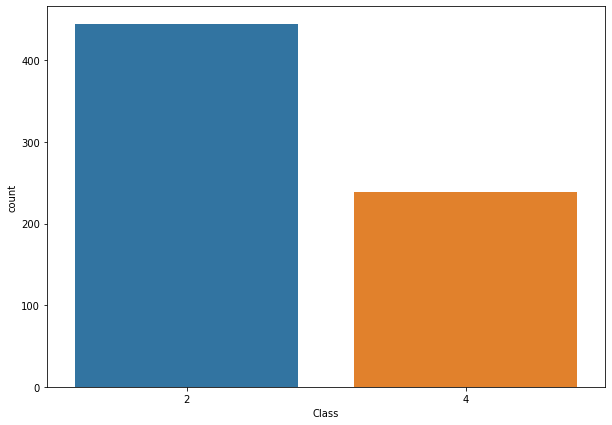

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Class', data=full_df, order=[2, 4] )

In [ ]:
full_df['Class'].value_counts()                  # Prints the count of different classes in 'Class'

2    444
4    239
Name: Class, dtype: int64

**Hence, We found that our data is imbalanced.**

In [ ]:
full_df_benign = full_df[full_df.Class==2]              # MAJORITY
full_df_malignant = full_df[full_df.Class==4]           # MINORITY

# **Upsampling**

In [ ]:
# Upsample MINORITY Class to make balance data :
full_df_malignant_upsampled = resample(full_df_malignant, replace=True, n_samples=444, random_state=8) 

In [ ]:
# Combine downsampled majority class with upsampled minority class
Balanced_full_df = pd.concat([full_df_malignant_upsampled, full_df_benign]).reset_index(drop=True)
 
# Display new class counts
Balanced_full_df.Class.value_counts()           # Prints the count of different classes in 'Class'

4    444
2    444
Name: Class, dtype: int64

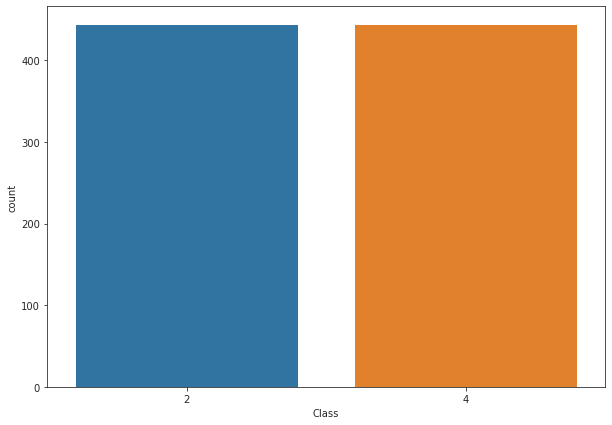

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Class', data=Balanced_full_df, order=[2, 4] )

In [ ]:
Balanced_full_df.head()

,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marginal_Adhesion,Single_Epith_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,8,10,10,10,7,5,4,8,7,4
1,10,8,8,4,10,10,8,1,1,4
2,8,10,10,8,6,9,3,10,10,4
3,5,5,7,8,6,10,7,4,1,4
4,5,4,6,8,4,1,8,10,1,4


# **Correlation Matrix and Heat Map**

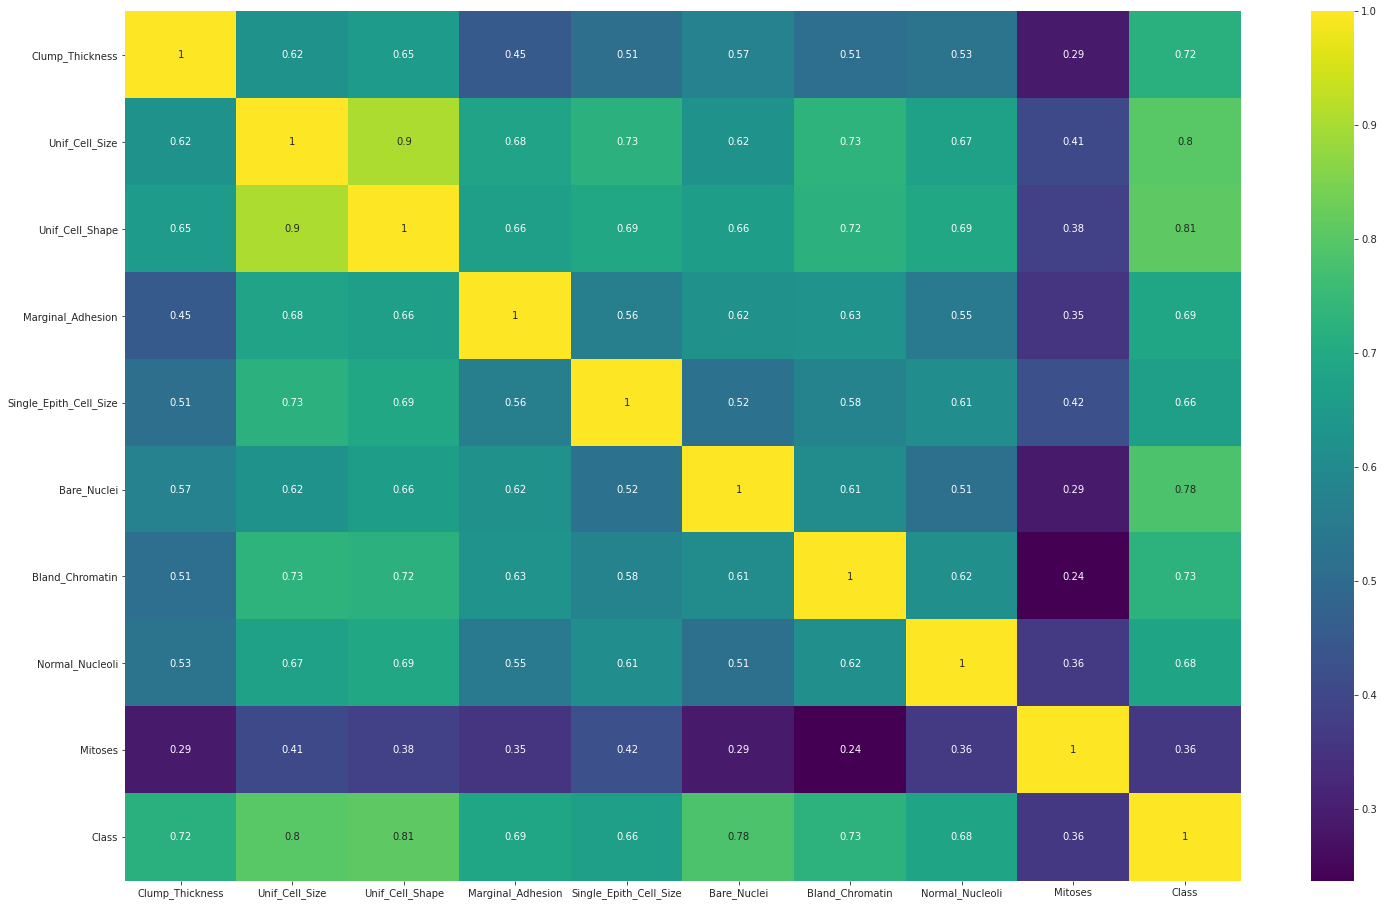

In [ ]:
corr_data = Balanced_full_df.corr()                     # calculating correlation data between features
plt.figure(figsize=(25, 16))                            # setting figure size
sns.set_style('ticks')                                  # setting plot style
sns.heatmap(corr_data, cmap='viridis',annot=True)       # plotting heatmap using sns library
plt.show()

Text(0, 0.5, 'Features')

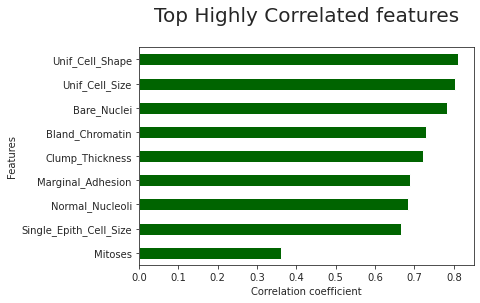

In [ ]:
corr_data.Class.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:10][::-1].plot(kind='barh',color='darkgreen') 
# calculating top highest correlated features
# with respect to target variable i.e. "Class"
plt.title("Top Highly Correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

# **Perform Analysis on Selected Features:**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

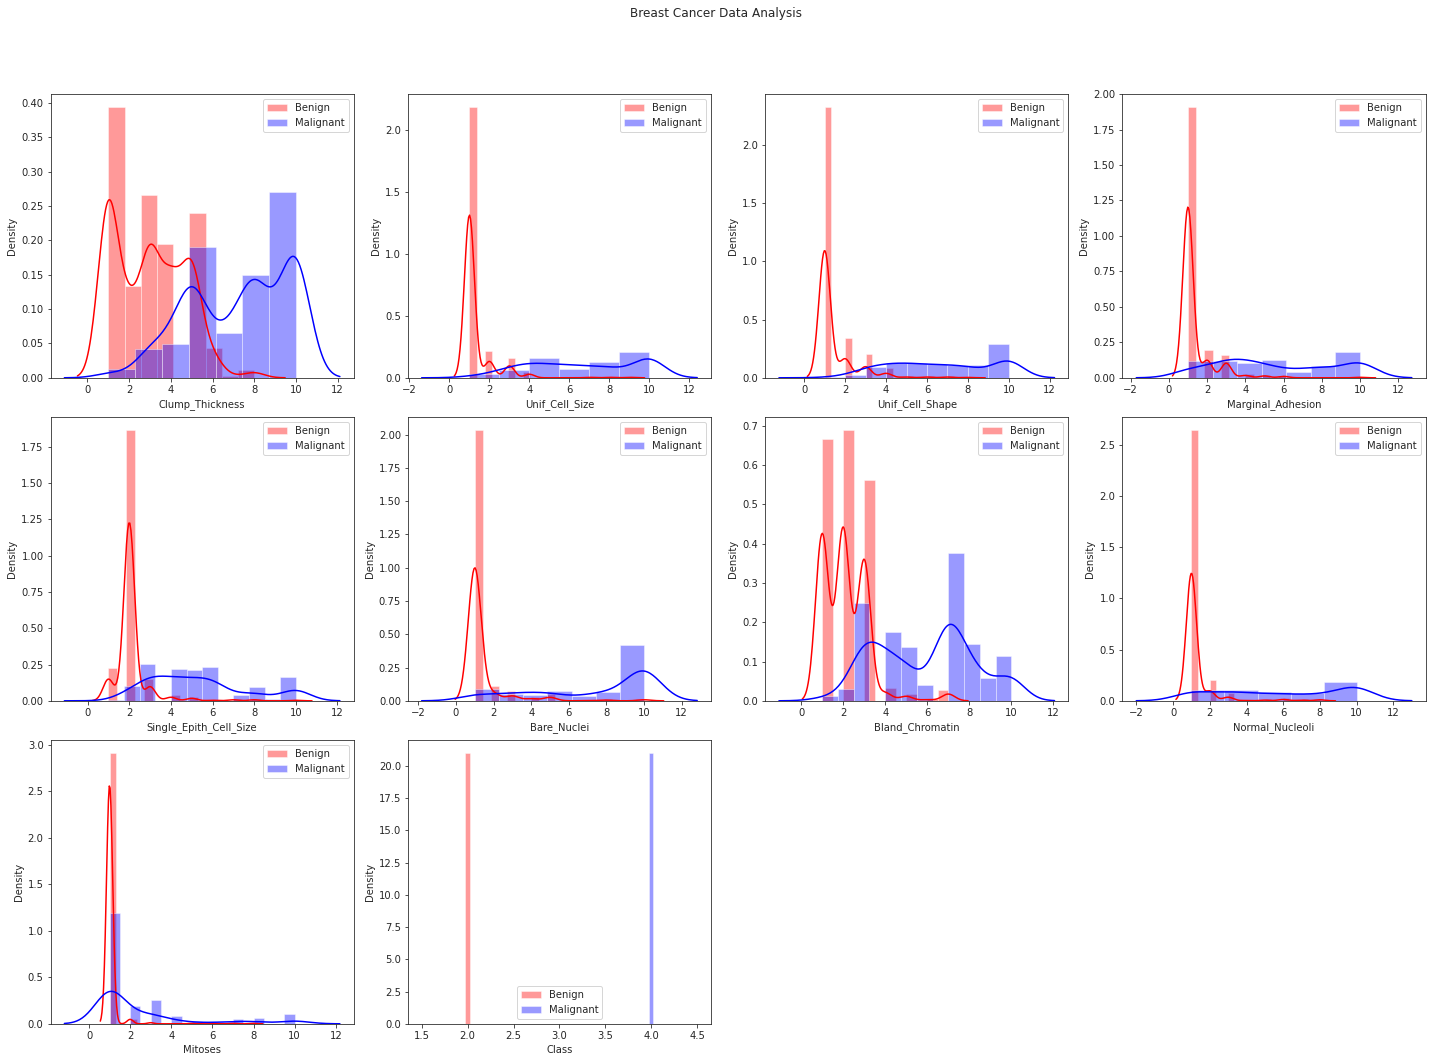

In [ ]:
fig = plt.figure(figsize = (20, 15))
j = 0
for i in full_df.columns:
    plt.subplot(3, 4, j+1)
    j += 1
    sns.distplot(Balanced_full_df[i][Balanced_full_df['Class']==2], color='r', label = 'Benign')
    sns.distplot(Balanced_full_df[i][Balanced_full_df['Class']==4], color='b', label = 'Malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cancer Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

In [ ]:
Balanced_full_df_X = Balanced_full_df.drop(['Class'], axis=1)
Balanced_full_df_y = Balanced_full_df.Class

In [ ]:
Balanced_full_df_X.head()

,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marginal_Adhesion,Single_Epith_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,8,10,10,10,7,5,4,8,7
1,10,8,8,4,10,10,8,1,1
2,8,10,10,8,6,9,3,10,10
3,5,5,7,8,6,10,7,4,1
4,5,4,6,8,4,1,8,10,1


In [ ]:
# Splitting Balanced_full_df into 70% and 30% to construct Training and Testing Data respectively.
trainX, testX, trainy, testy = train_test_split(Balanced_full_df_X, Balanced_full_df_y,test_size=0.3,random_state=9)

In [ ]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 379 to 382
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Clump_Thickness         621 non-null    int64
 1   Unif_Cell_Size          621 non-null    int64
 2   Unif_Cell_Shape         621 non-null    int64
 3   Marginal_Adhesion       621 non-null    int64
 4   Single_Epith_Cell_Size  621 non-null    int64
 5   Bare_Nuclei             621 non-null    int64
 6   Bland_Chromatin         621 non-null    int64
 7   Normal_Nucleoli         621 non-null    int64
 8   Mitoses                 621 non-null    int64
dtypes: int64(9)
memory usage: 48.5 KB


In [ ]:
trainy.head()

379    4
370    4
851    2
805    2
257    4
Name: Class, dtype: int64

In [ ]:
testX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 40 to 288
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Clump_Thickness         267 non-null    int64
 1   Unif_Cell_Size          267 non-null    int64
 2   Unif_Cell_Shape         267 non-null    int64
 3   Marginal_Adhesion       267 non-null    int64
 4   Single_Epith_Cell_Size  267 non-null    int64
 5   Bare_Nuclei             267 non-null    int64
 6   Bland_Chromatin         267 non-null    int64
 7   Normal_Nucleoli         267 non-null    int64
 8   Mitoses                 267 non-null    int64
dtypes: int64(9)
memory usage: 20.9 KB


In [ ]:
testy.head()

40     4
694    2
213    4
459    2
597    2
Name: Class, dtype: int64

# **Creating Decision Tree Classifier:**

In [ ]:
DT_Model = DecisionTreeClassifier(criterion = "entropy",splitter = "random", random_state = 99, max_depth=4, min_samples_leaf=5)  

# Train the model using the training sets
DT_Model.fit(trainX, trainy) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='random')

# **Creating Perceptron Classifier:**

In [ ]:
percepton_model = Perceptron(max_iter=6000, eta0=100, random_state=0)

# Train the perceptron using the training sets
percepton_model.fit(trainX, trainy)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=100,
           fit_intercept=True, max_iter=6000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

# **Creating K-Nearest Neighbour Classifier:**

In [ ]:
KNN_Model = KNeighborsClassifier(n_neighbors = 4, weights ='distance')

# Train the KNN Model using the training sets
KNN_Model.fit(trainX, trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

# **Perform Prediction on Training Data:**

In [ ]:
# Apply the trained Decision Tree Model to make prediction of train data
DT_train_pred = DT_Model.predict(trainX)

In [ ]:
# Apply the trained perceptron to make prediction of train data
percepton_train_pred = percepton_model.predict(trainX)

In [ ]:
# Apply the trained KNN Model to make prediction of train data
KNN_train_pred = KNN_Model.predict(trainX)

# **Perform Prediction on Testing Data:**

In [ ]:
# Apply the trained Decision Tree Model to make prediction of test data
DT_test_pred = DT_Model.predict(testX)

In [ ]:
# Apply the trained perceptron to make prediction of test data
percepton_test_pred = percepton_model.predict(testX)

In [ ]:
# Apply the trained KNN Model to make prediction of test data
KNN_test_pred = KNN_Model.predict(testX)

# **Evaluation**

### **On Training:**

In [ ]:
print("DT_Confusion Matrix:")
print(confusion_matrix(trainy, DT_train_pred))

print("DT_Classification Report")
print(classification_report(trainy, DT_train_pred))

DT_Confusion Matrix:
[[290  16]
 [  6 309]]
DT_Classification Report
              precision    recall  f1-score   support

           2       0.98      0.95      0.96       306
           4       0.95      0.98      0.97       315

    accuracy                           0.96       621
   macro avg       0.97      0.96      0.96       621
weighted avg       0.97      0.96      0.96       621



In [ ]:
print("Percepton Confusion Matrix:")
print(confusion_matrix(trainy, percepton_train_pred))

print("Percepton Classification Report")
print(classification_report(trainy, percepton_train_pred))

Percepton Confusion Matrix:
[[298   8]
 [  9 306]]
Percepton Classification Report
              precision    recall  f1-score   support

           2       0.97      0.97      0.97       306
           4       0.97      0.97      0.97       315

    accuracy                           0.97       621
   macro avg       0.97      0.97      0.97       621
weighted avg       0.97      0.97      0.97       621



In [ ]:
print("KNN Confusion Matrix:")
print(confusion_matrix(trainy, KNN_train_pred))

print("KNN Classification Report")
print(classification_report(trainy, KNN_train_pred))

KNN Confusion Matrix:
[[306   0]
 [  0 315]]
KNN Classification Report
              precision    recall  f1-score   support

           2       1.00      1.00      1.00       306
           4       1.00      1.00      1.00       315

    accuracy                           1.00       621
   macro avg       1.00      1.00      1.00       621
weighted avg       1.00      1.00      1.00       621



### **On Testing:**

In [ ]:
print("DT_Confusion Matrix:")
print(confusion_matrix(testy, DT_test_predictions))

print("DT_Classification Report")
print(classification_report(testy, DT_test_predictions))

DT_Confusion Matrix:
[[131   7]
 [  2 127]]
DT_Classification Report
              precision    recall  f1-score   support

           2       0.98      0.95      0.97       138
           4       0.95      0.98      0.97       129

    accuracy                           0.97       267
   macro avg       0.97      0.97      0.97       267
weighted avg       0.97      0.97      0.97       267



In [ ]:
print("Percepton Confusion Matrix:")
print(confusion_matrix(testy, percepton_test_pred))

print("Percepton Classification Report")
print(classification_report(testy, percepton_test_pred))

Percepton Confusion Matrix:
[[134   4]
 [  2 127]]
Percepton Classification Report
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       138
           4       0.97      0.98      0.98       129

    accuracy                           0.98       267
   macro avg       0.98      0.98      0.98       267
weighted avg       0.98      0.98      0.98       267



In [ ]:
print("KNN Confusion Matrix:")
print(confusion_matrix(testy, KNN_test_pred))

print("KNN Classification Report")
print(classification_report(testy, KNN_test_pred))

KNN Confusion Matrix:
[[135   3]
 [  1 128]]
KNN Classification Report
              precision    recall  f1-score   support

           2       0.99      0.98      0.99       138
           4       0.98      0.99      0.98       129

    accuracy                           0.99       267
   macro avg       0.98      0.99      0.99       267
weighted avg       0.99      0.99      0.99       267



**Best Model Selected is K Nearest Neighbour which gives Accuracy of 100% on Training Data and 99% on Testing Data.**



# **Predictions on Test Data:**

In [ ]:
OutputDF = pd.DataFrame({'Actual_class_of_breast_cancer':testy,'Predicted_class_of_breast_cancer':KNN_test_pred})

In [ ]:
#Save to csv
OutputDF.to_csv('breast_cancer_pred.csv',index=False)
OutputDF.head()

,Actual_class_of_breast_cancer,Predicted_class_of_breast_cancer
40,4,4
694,2,2
213,4,4
459,2,2
597,2,2


**Thank you**,<br>
Nikunj Bansal,<br>
R177218063,<br>
B2 Batch<br>